In [1]:
using Spectra, Plots

[ Info: Precompiling Spectra [391af1a9-06f1-59d3-8d21-0be089654739] (cache misses: include_dependency fsize change (2), wrong dep version loaded (2), mismatched flags (14))


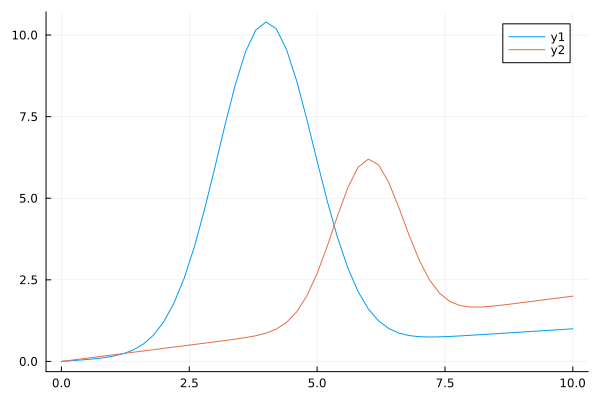

In [18]:
# we create a fake signal with 
x = collect(0.:0.2:10.)

# create a signal that is the combination of two gaussian peaks plus a background
background_1 = 0.1 * x
background_2 = 0.2 * x
_, ys = gaussiennes([10.,5.], [4.,6.], [1.1,0.8], x)
ys[:,1] = ys[:,1] .+ background_1
ys[:,2] = ys[:,2] .+ background_2
plot(x, ys)

# Fit Background

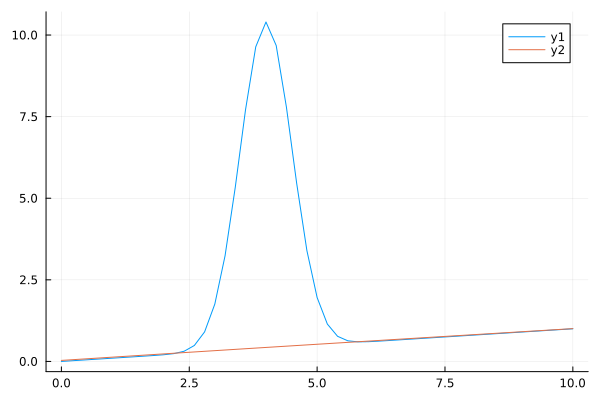

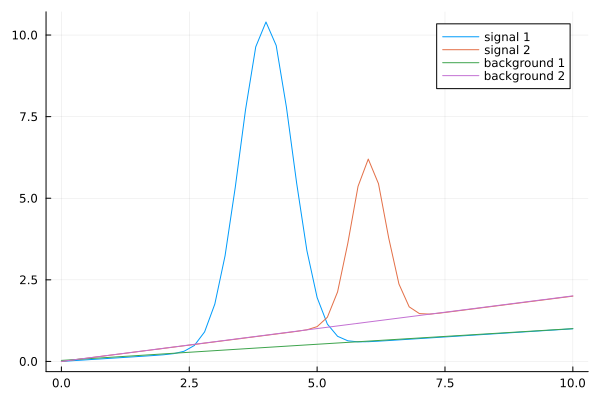

In [2]:
# we create a fake signal with 2 peaks plus 2 backgrounds
x = collect(0.:0.2:10.)

# create the signals with gaussiennes
_, ys = gaussiennes([10.,5.], [4.,6.], [0.6,0.4], x)

# add backgrounds
ys[:,1] = ys[:,1] .+ 0.1 * x
ys[:,2] = ys[:,2] .+ 0.2 * x

# fit the background on the first peak: provide as a vector
y_corr, base_ = baseline(x, vec(ys[:,1]), method="als")
p1 = plot(x, ys[:,1])
plot!(x, base_)
display(p1)

# Fit the background on multiple peaks: just provide the array!
y_corr, base_ = baseline(x, ys, method="als")
p2 = plot(x, ys, label=["signal 1" "signal 2"])
plot!(x, base_, label=["background 1" "background 2"])
display(p2)

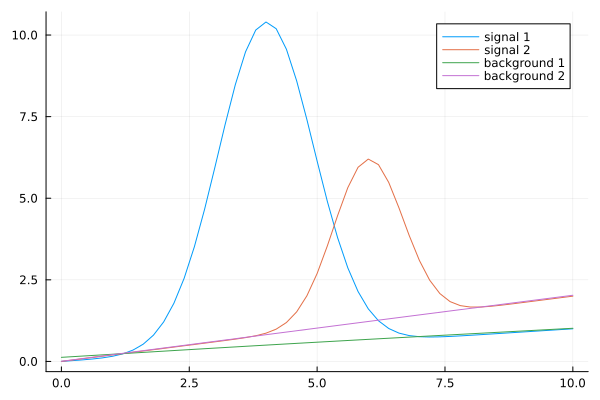

In [21]:
y_corr, base_ = baseline(x, ys, method="als")

([-0.12412310827290157 -0.004172430330871832; -0.12164295736595948 -0.004930818412795135; … ; -0.019014472653280712 -0.02753403145335831; -0.01589227772454782 -0.027622621924912938], [0.12516888283553307 0.00417243033087189; 0.1441988515024808 0.04493081841279589; … ; 0.9990145153966301 1.9875348386525666; 1.0158922887840522 2.027622770936525])

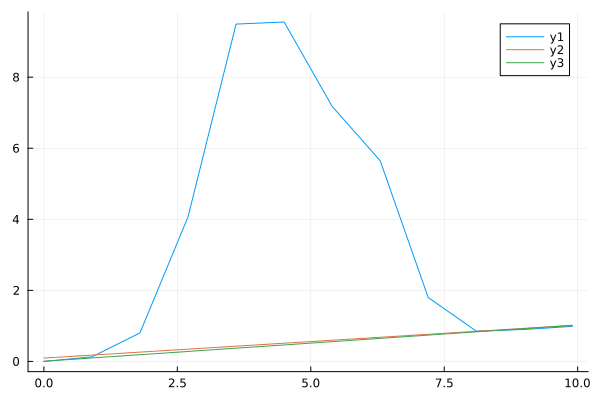

In [7]:
p1 = plot(x, y)
plot!(x, base_)
display(p1)